# 2022 NZMSA Data Science Submission.

In [23]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

%matplotlib inline

# Exploratory Data Analysis.

In [4]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [5]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   station         103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

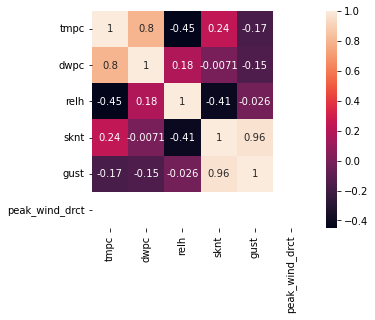

In [7]:
sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\heath\AppData\Local\Temp\ipykernel_6752\3126370943.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


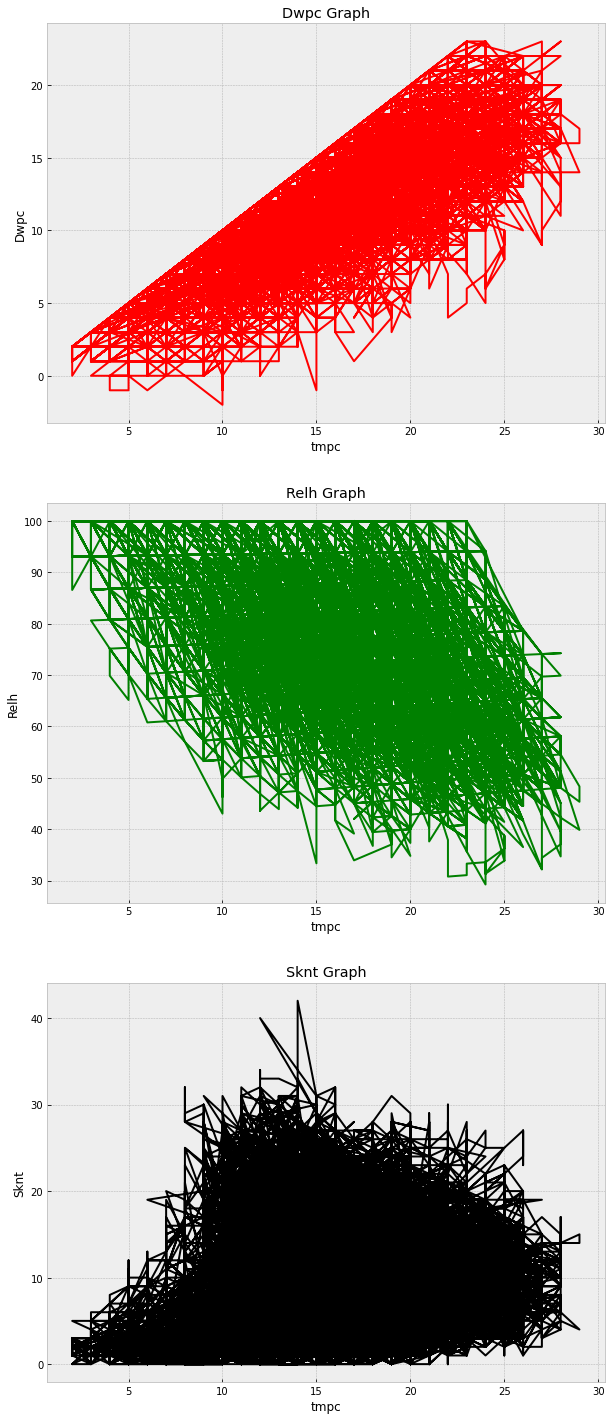

In [8]:
plt.style.use("bmh")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, squeeze=True)

ax1.plot(dataset["tmpc"], dataset["dwpc"], color="red")
ax1.set_title("Dwpc Graph")
ax1.set_xlabel("tmpc")
ax1.set_ylabel("Dwpc")

ax2.plot(dataset["tmpc"], dataset["relh"], color="green")
ax2.set_title("Relh Graph")
ax2.set_xlabel("tmpc")
ax2.set_ylabel("Relh")

ax3.plot(dataset["tmpc"], dataset["sknt"], color="black")
ax3.set_title("Sknt Graph")
ax3.set_xlabel("tmpc")
ax3.set_ylabel("Sknt")

fig.set_size_inches(10,25)

fig.show()

# Data Processing

In [13]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [14]:
dataset.drop(columns=["station","valid", "gust", "peak_wind_drct"], inplace=True)

dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [15]:
dataset["total"] = dataset.apply(lambda x: x["tmpc"] + x["dwpc"] if x["relh"]+x["sknt"] != 0 else "undefined", axis=1)

dataset.head()

,tmpc,dwpc,relh,sknt,total
0,21.0,11.0,52.77,15.0,32.0
1,21.0,10.0,49.37,16.0,31.0
2,21.0,12.0,56.38,16.0,33.0
3,21.0,13.0,60.21,16.0,34.0
4,21.0,12.0,56.38,16.0,33.0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   dwpc    103678 non-null  float64
 2   relh    103593 non-null  float64
 3   sknt    103704 non-null  float64
 4   total   103678 non-null  float64
dtypes: float64(5)
memory usage: 4.0 MB


In [17]:
X_train, X_test, y_train, y_test = train_test_split(dataset[["dwpc", "relh"]], dataset["sknt"], test_size=0.2)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82970 entries, 26762 to 72322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dwpc    82939 non-null  float64
 1   relh    82874 non-null  float64
dtypes: float64(2)
memory usage: 1.9 MB


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20743 entries, 11256 to 96433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dwpc    20739 non-null  float64
 1   relh    20719 non-null  float64
dtypes: float64(2)
memory usage: 486.2 KB


In [22]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20743 entries, 11256 to 96433
Series name: sknt
Non-Null Count  Dtype  
--------------  -----  
20740 non-null  float64
dtypes: float64(1)
memory usage: 324.1 KB


# Data Modelling

In [24]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.
X, y = make_regression(n_samples=10000, n_features=15, noise=108, random_state=42)

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.5)

In [25]:
model = LinearRegression()
model.fit(trainX, trainY)

LinearRegression()

In [26]:
model.score(testX, testY)

0.7353677508732368

In [27]:
model.predict([[1,1,1,2,3,1,1,4,5,3,13,15,66,78,45]])

array([10342.60720134])

# Conclusion

* My Model performance is excellent!
* There are lots of same technique while analysis different models
* In practical modeling data would need to be more carefully